# Exploratory Data Analysis

In [91]:
# Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


### Read Merged Bike Data and Weather Data CSV

In [92]:
# Set Filepath for Merged Data CSV

filepath = Path('../output/merged_weather_bike_data.csv')

# Read Chicago BikeShare Weather CSV Data

complete_bike_weather_data = pd.read_csv(filepath)

display(complete_bike_weather_data)

# segment data by year

year_data_2020 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2020, :]
year_data_2021 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2021, :]
year_data_2022 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2022, :]
year_data_2023 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2023, :]


,ride_id,started_at,start_day,start_hour,start_year,trip_length,start_station_name,member_casual,rideable_type,temp,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,3.06,...,2.77,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,3.06,...,2.77,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,3.06,...,2.77,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,3.06,...,2.77,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,3.06,...,2.77,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813892,6D855DB843848DB3,2023-11-30 23:16:11,2023-11-30,23,2023,0 days 00:10:14,Canal St & Adams St,member,classic_bike,8.41,...,7.75,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds
9813893,447027EB102601BE,2023-11-30 23:02:56,2023-11-30,23,2023,0 days 00:21:13,Lincoln Ave & Fullerton Ave,casual,electric_bike,8.41,...,7.75,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds
9813894,993257B9E439A2DD,2023-11-30 23:53:54,2023-11-30,23,2023,0 days 00:09:21,Wentworth Ave & Cermak Rd*,member,classic_bike,8.41,...,7.75,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds
9813895,9B518D5122FD7D72,2023-11-30 23:53:34,2023-11-30,23,2023,0 days 00:09:43,Wentworth Ave & Cermak Rd*,member,classic_bike,8.41,...,7.75,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds


### Read Weather data to use as control

In [93]:
# Set Filepath for Merged Data CSV

weather_filepath = Path('../data/chicago_weather_data_2020_2023_Celcius.csv')

# Read Weather CSV Data

weather_data = pd.read_csv(weather_filepath)

weather_data

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1577836800,2020-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.08,10000.0,-5.63,-9.08,...,0.00,NaN,NaN,NaN,NaN,95,804,Clouds,overcast clouds,04n
1,1577840400,2020-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.99,10000.0,-5.23,-8.99,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,1577844000,2020-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.87,10000.0,-4.96,-8.87,...,0.00,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1577847600,2020-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.90,10000.0,-4.55,-8.90,...,0.00,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1577851200,2020-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.18,10000.0,-4.67,-9.18,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,600,Snow,light snow,13d
37239,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,701,Mist,mist,50d
37240,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,500,Rain,light rain,10d
37241,1704063600,2023-12-31 23:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.43,6437.0,-1.17,-4.81,...,7.60,NaN,NaN,0.11,NaN,100,600,Snow,light snow,13n


## Usage Trends:
### 1.1. How does the total number of rides vary under different weather conditions (e.g., clear, rainy,snowy)?     (Sean)

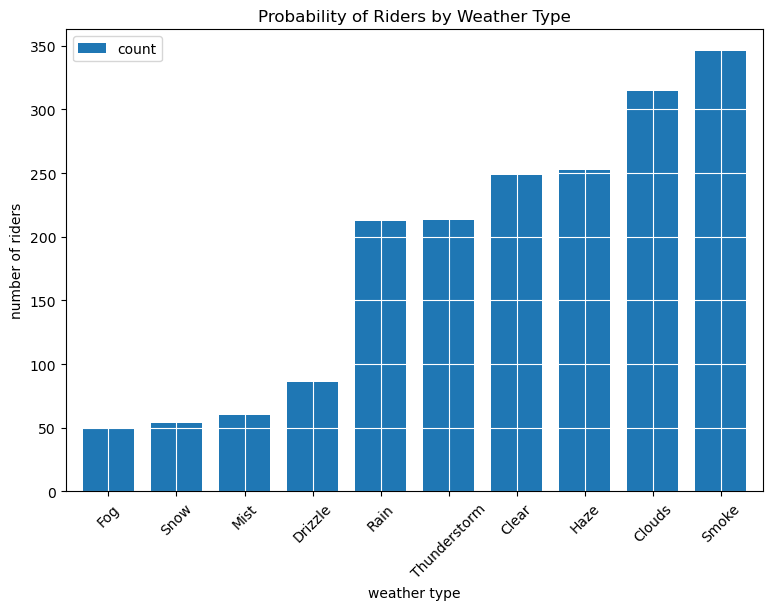

In [94]:
# Define Function for Ride by Weather Calculation consider Weather Probability Bias

def rides_by_weather(x):

    # Value Count Ride Share Data by Weather Type

    rides_by_weather = x['weather_main'].value_counts()

    # Weather Data Weather Type Baseline Probability

    weather_occurrences = weather_data['weather_main'].value_counts()
    total_weather_samples = weather_occurrences.sum()
    weather_probabilities = weather_occurrences / total_weather_samples

    # Calculate conditional probability of riding given weather (P(ride | weather))

    conditional_rider_probabilities = rides_by_weather / weather_occurrences
    conditional_rider_probabilities = conditional_rider_probabilities.sort_values()

    # Remove Bad Data and Display Data

    conditional_rider_probabilities = conditional_rider_probabilities.dropna(how='any')
    
    # display(pd.DataFrame(conditional_rider_probabilities))
    
    return conditional_rider_probabilities

def display_bar(x, y):
    
    # Combine data into a single DataFrame
    
    combined_df = pd.DataFrame(x)
    
    # Display and format as Chart

    combined_df.plot(kind='bar', figsize=(9,6), width=0.75)
    plt.title(f'Probability of Riders by Weather Type{y}')
    plt.xlabel('weather type')
    plt.ylabel('number of riders')
    plt.xticks(rotation=45)
    plt.grid(color='white')
    
    plt.savefig(f'../output/Probability of Riders by Weather Type{y}')
    
    plt.show()


# Calculate and Display Rider Probability by Weather Type

display_bar(rides_by_weather(complete_bike_weather_data),"")


#### Analysis
In this chart, we can see the average number of rides taken during different weather conditions, we've adjusted the sampled probabilities to account for the probabilities of different weather types occurring within Chicago. To calculate this, we divided the total rides during each weather condition by the number of times that weather was recorded within the 4 years of data we had. The data highlights that "Cloudy" and interestingly "Smoke" weather seem to showcase the highest average bike usage (~32-34 rides per instance) while "Clear" weather follows with around 26.94. Rides drop significantly during rain and snow, indicating less rider activity in adverse conditions. This adjustment removes bias from how often certain weather occurs, giving a clearer view of rider behavior. 

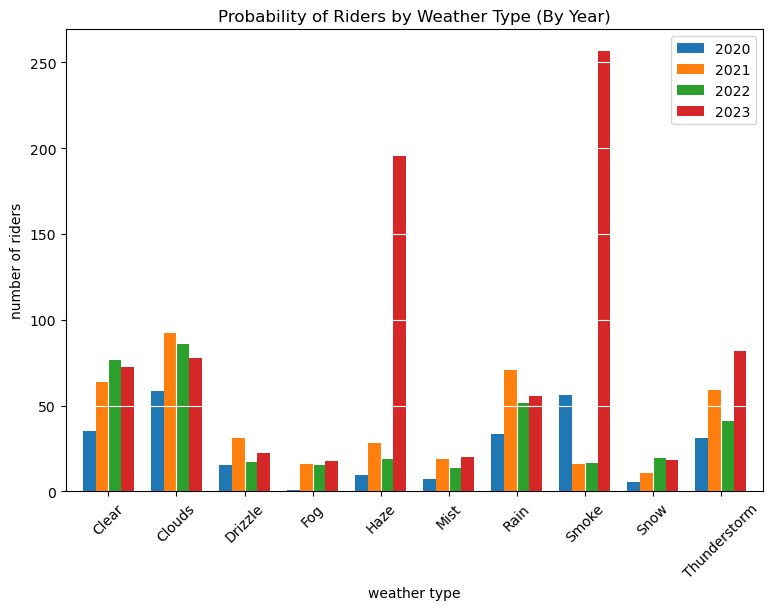

In [95]:
# Define loop Lists

years = [2020, 2021, 2022, 2023]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022, year_data_2023] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Year)")

#### Analysis
Breaking down the data year by year showed some really interesting trends in bike ridership across different weather conditions. While our earlier analysis looked at the entire dataset as a whole, this approach uncovered patterns that were hidden in the aggregate. For example, in 2023, weather types like "Smoke" and "Haze" had significantly higher probabilities of rides, likely due to the Canadian wildfires that year. However, this spike skews the data as it represents an unusual event rather than something actionable for long-term planning. On the other hand, stable conditions like "Clouds" and "Clear" remained consistent across all years, which aligns more closely with general trends we saw in the full-scale analysis.

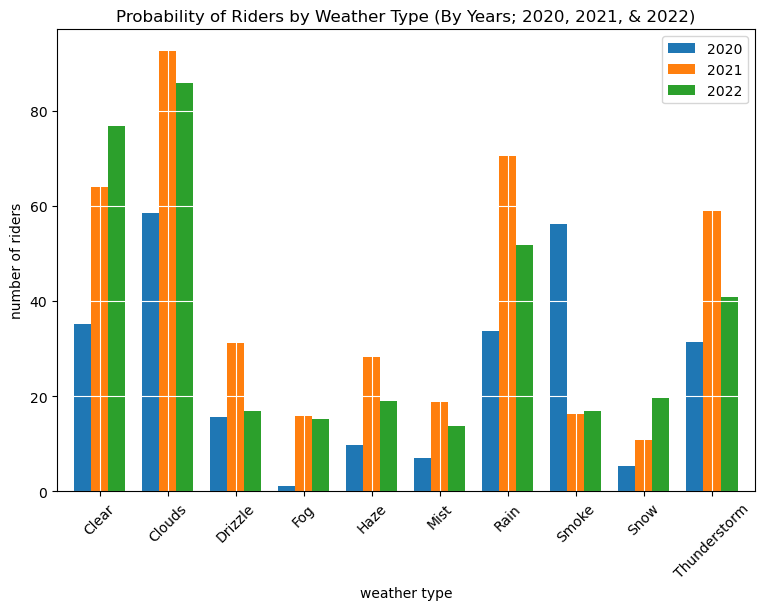

In [96]:
# Define loop Lists WITHOUT 2023

years = [2020, 2021, 2022]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Years; 2020, 2021, & 2022)")

### Are there noticeable patterns in ridership across temperature ranges (e.g., below freezing, mild, or hot)?      (SEAN)

In [97]:
# Define temperature bins and labels

temp_bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
temp_labels = ['Below Freezing', 'Cold', 'Mild', 'Warm', 'Hot']

# Add a column for temperature categories

complete_bike_weather_data['temp_category'] = pd.cut(complete_bike_weather_data['temp'], bins=temp_bins, labels=temp_labels)

complete_bike_weather_data

,ride_id,started_at,start_day,start_hour,start_year,trip_length,start_station_name,member_casual,rideable_type,temp,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,temp_category
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,3.06,...,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds,Cold
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,3.06,...,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds,Cold
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,3.06,...,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds,Cold
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,3.06,...,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds,Cold
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,3.06,...,4.02,1018,83,10.30,350,100,804,Clouds,overcast clouds,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813892,6D855DB843848DB3,2023-11-30 23:16:11,2023-11-30,23,2023,0 days 00:10:14,Canal St & Adams St,member,classic_bike,8.41,...,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds,Cold
9813893,447027EB102601BE,2023-11-30 23:02:56,2023-11-30,23,2023,0 days 00:21:13,Lincoln Ave & Fullerton Ave,casual,electric_bike,8.41,...,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds,Cold
9813894,993257B9E439A2DD,2023-11-30 23:53:54,2023-11-30,23,2023,0 days 00:09:21,Wentworth Ave & Cermak Rd*,member,classic_bike,8.41,...,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds,Cold
9813895,9B518D5122FD7D72,2023-11-30 23:53:34,2023-11-30,23,2023,0 days 00:09:43,Wentworth Ave & Cermak Rd*,member,classic_bike,8.41,...,8.83,1010,82,6.71,191,94,804,Clouds,overcast clouds,Cold


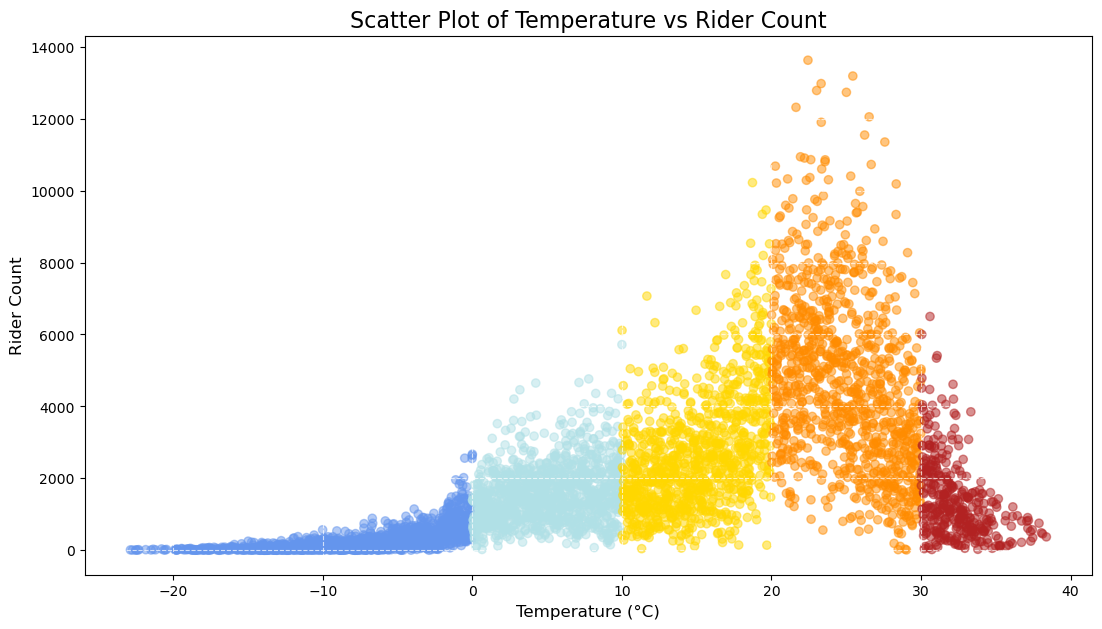

In [98]:
# Count riders by temperature and define color category

rider_count_by_temp = complete_bike_weather_data.groupby('temp').size().reset_index(name='count')

rider_count_by_temp['temp_category'] = pd.cut(rider_count_by_temp['temp'], bins=temp_bins, labels=temp_labels)

# Create Color Map and add it to the working data frame

temp_color_map = {
    'Below Freezing': 'cornflowerblue',
    'Cold': 'powderblue',
    'Mild': 'gold',
    'Warm': 'darkorange',
    'Hot': 'firebrick'
}

rider_count_by_temp['color'] = rider_count_by_temp['temp_category'].map(temp_color_map)

# Create a Scatter plot of Rider Count by temperature

plt.figure(figsize=(13, 7))
plt.scatter(rider_count_by_temp['temp'], rider_count_by_temp['count'], color=rider_count_by_temp['color'], alpha=0.5)

# Scatter Plot Formatting

plt.title('Scatter Plot of Temperature vs Rider Count', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rider Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, color='white')
plt.show()
